<h6><center>Amine LAKHAL & Mohamed Khalil JAMAI</center></h6>

# Jeux de données

Nous utilisons 6 Datasets pour la suite des TPs. Chaque Dataset répond à un ou plusieurs critères:

In [80]:
#Importing
from scipy.io import arff
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn import metrics
import time
from matplotlib.pyplot import figure

In [23]:
def show_dataset(dataset,axe,title):

    x,y,z=[],[],[]
    #If z='Class 2' and not '2', so we split and keep after the space
    if str(dataset[0][0][2]).startswith('Class'):
        for i in range(len(dataset[0])) :
            x.append(dataset[0][i][0])
            y.append(dataset[0][i][1])
            z.append(dataset[0][i][2].split()[1])  
    else: 
        for i in range(len(dataset[0])) :
            x.append(dataset[0][i][0])
            y.append(dataset[0][i][1])
            if str(dataset[0][i][2]).startswith('nois'): 
                z.append(-1) #Noise
            else :
                z.append(dataset[0][i][2])
    #Plot of Dataset
    #plt.rcParams["figure.figsize"] = [xsize,ysize]
    axe.scatter(x, y,c = z)
    axe.set_title(title)
    #plt.show()
    
    return len(set(z))

- Formes convexes et Données non bruités : 2 Diamonds
- Formes non convexes avec des densités égales : Banana
- Formes convexes et bien separées : Spherical_4_3
- Formes mal separées : Sizes1
- Formes avec des densités différentes : wingnut et Disk Dense 3000
- Données bruités : wingnut (et xclara)


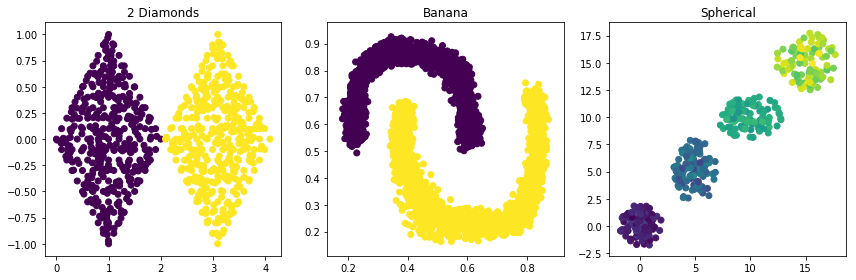

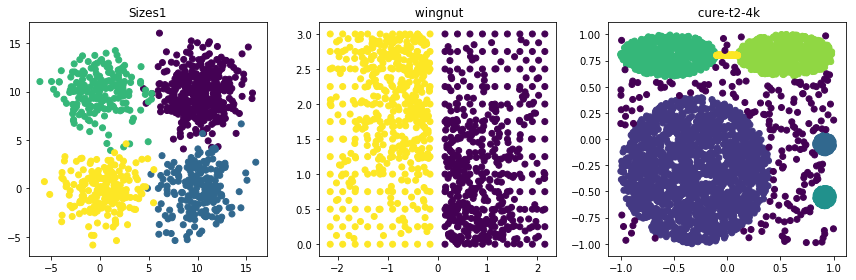

In [24]:
#Lien Github pour les datasets:https://github.com/deric/clustering-benchmark
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12,4))

print("- Formes convexes et Données non bruités : 2 Diamonds")
dataset_2d = arff.loadarff(open('twodiamonds.arff','r'))
dataset_2d_clusters = show_dataset(dataset_2d,axes[0],"2 Diamonds")

print("- Formes non convexes avec des densités égales : Banana")
dataset_banana = arff.loadarff(open('banana.arff','r'))
dataset_banana_clusters = show_dataset(dataset_banana,axes[1],"Banana")

print("- Formes convexes et bien separées : Spherical_4_3")
dataset_spherical = arff.loadarff(open('spherical_4_3.arff','r'))
dataset_spherical_clusters = show_dataset(dataset_spherical,axes[2],"Spherical")

fig.tight_layout()
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12,4))

print("- Formes mal separées : Sizes1")
dataset_sizes1 = arff.loadarff(open('sizes1.arff','r'))
dataset_sizes1_clusters = show_dataset(dataset_sizes1,axes[0],"Sizes1")

print("- Formes avec des densités différentes : wingnut et Disk Dense 3000")
dataset_dd3000 = arff.loadarff(open('dense-disk-3000.arff','r'))
#dataset_dd3000_clusters = show_dataset(dataset_dd3000,axes[0],"Disk Dense 3000")

dataset_wing = arff.loadarff(open('wingnut.arff','r'))
dataset_wing_clusters = show_dataset(dataset_wing,axes[1]," wingnut")

print("- Données bruités : wingnut (et xclara)")
dataset_xc = arff.loadarff(open('xclara.arff','r'))
#dataset_xc_clusters = show_dataset(dataset_xc,axes[1]," Xclara")

dataset_noise = arff.loadarff(open('cure-t2-4k.arff','r'))
dataset_noise_clusters = show_dataset(dataset_noise,axes[2]," cure-t2-4k")


fig.tight_layout()

In [25]:
#Return the data (x,y) of a certain a dataset, to use it in a classfier
def get_data(dataset):
    data=[]
    for i in range(len(dataset[0])) :
        data.append([dataset[0][i][0], dataset[0][i][1]])
    return data

In [256]:
#Return the plot of the model clusters + originals dataset models
def show_model(labels,dataset, originalTitle,modelTitle):
    
    x,y,z,data=[],[],[],[]
    for i in range(len(dataset[0])) :
        x.append(dataset[0][i][0])
        y.append(dataset[0][i][1])
    
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
    nb_clustersModel = len(set(labels))
    show_dataset(dataset,axes[0],originalTitle)
    axes[1].scatter(x, y,c = labels)
    axes[1].set_title(modelTitle)
    

def show_model3(labels,labels2,dataset, originalTitle,modelTitle,model2Title):
    
    x,y,z,data=[],[],[],[]
    for i in range(len(dataset[0])) :
        x.append(dataset[0][i][0])
        y.append(dataset[0][i][1])
    
    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(14,4))
    nb_clustersModel = len(set(labels))
    show_dataset(dataset,axes[0],originalTitle)
    axes[1].scatter(x, y,c = labels)
    axes[1].set_title(modelTitle)
    axes[2].scatter(x, y,c = labels2)
    axes[2].set_title(model2Title)

# Clustering k-Means

Parmi les jeux de données retenus, soit des formes convexes, formes convexes mal séparées, des formes non convexes et des formes de densité variable, etc., nous allons appliquer itérativement la méthode précédente pour déterminer le bon nombre de clusters à l’aide de critères d’évaluation.


In [233]:
def kmeans(dataset,okScore,okTime,datasetName):
    
    xclusters,ytime,yscore=[],[],[]
    best_time=-200.0
    best_score=-200 #The current best score model
    
    for i in range (2,11):

        start = time.time()  
        kmeans_model = KMeans(n_clusters=i).fit(get_data(dataset))
        delay = time.time() - start        
        #NB: On n'a pas la valeur de vérité pr le nb de cluster (2) à laquelle se comparer, on utilise dc des méthodes qui prennt en compte ca (ici, Silhouette Coefficient)
        labels = kmeans_model.labels_
        kmeans_score = metrics.silhouette_score(get_data(dataset), labels, metric='euclidean')*100

        #Update of best model
        if kmeans_score > best_score:
            best_score  = kmeans_score
            best_labels = kmeans_model.labels_
            best_time = delay
        
        #Ploting variables
        xclusters.append(i)
        ytime.append(delay)
        yscore.append(kmeans_score)

    if okScore:
        #Plot Score
        plt.scatter(xclusters,yscore)
        plt.title('Score du Classificateur en fonction du nombre de clusters choisi\n')
        plt.xlabel('Nombre de Clusters')
        plt.ylabel('Score')
        plt.rcParams["figure.figsize"] = [12,4]
        plt.show()
    
    if okTime : 
        #Plot Temps d'entrainement
        plt.scatter(xclusters,ytime)
        plt.title('Temps d\' entrainement du Classificateur en fonction du nombre de clusters choisi\n')
        plt.xlabel('Nombre de Clusters')
        plt.ylabel('Temps dentrainement')
        plt.rcParams["figure.figsize"] = [12,4]
        plt.show()
    print("Le meilleur modele pour "+datasetName+" contient "+str(len(set(best_labels)))+" clusters. Il a un score de "+str(round(best_score,2))+", et a un temps de calcul de "+str(round(best_time,4))+" secondes.")
    return best_labels

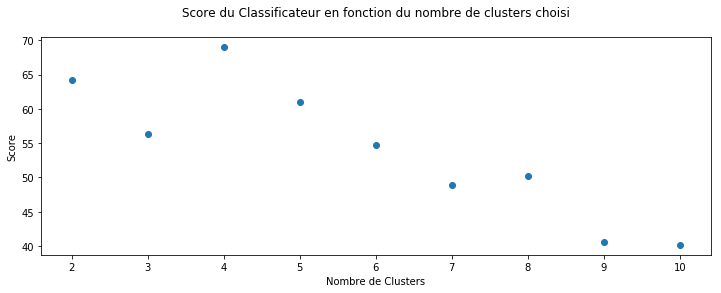

Le meilleur modele pour Spherical contient 4 clusters. Il a un score de 68.98, et a un temps de calcul de 0.03 secondes.


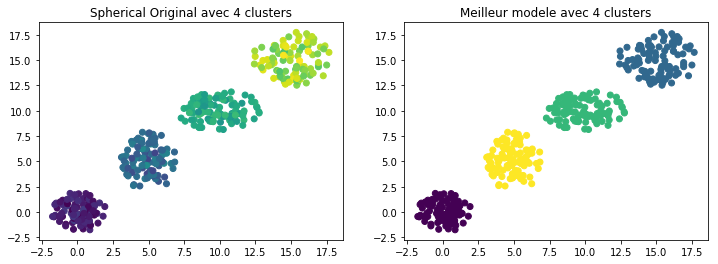

In [215]:
#Convexes bien separées : Spherical
labels_bestModel=kmeans(dataset_spherical,True,False,"Spherical")
show_model(labels_bestModel,dataset_spherical, "Spherical Original avec 4 clusters",
           "Meilleur modele avec "+str(len(set(labels_bestModel)))+" clusters")


En effet, nous nous attendions à obtenir 4 clusters tout comme la dataset, car elle est composée de 4 formes bien distinctes. Cela parait cohérent car dans notre cas, les formes sont assez petites et bien separées. C'est pour cela que ces formes ont du coincider parfaitement avec les centres de clusters choisis par K-means. On remarque également que les scores obtenus avec d'autres nombres de clusters restent plutot bons.

NB: Nous n'afficherons plus tous les graphes de scores par soucis de place. Il est possible de l'afficher en passant le paramètre 'okScore' à True.


 - Formes convexes mal séparées : Sizes1
Le meilleur modele pour Sizes1 contient 4 clusters. Il a un score de 59.34, et a un temps de calcul de 0.11 secondes.


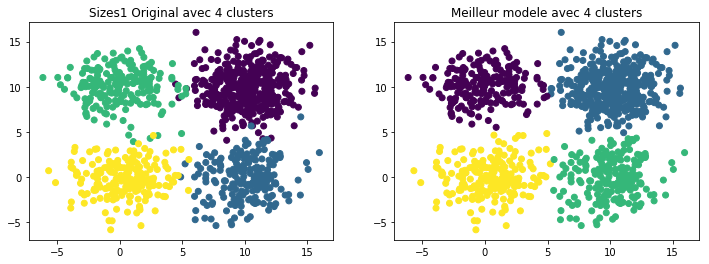

In [211]:
print("\n - Formes convexes mal séparées : Sizes1")
labels_bestModel1 = kmeans(dataset_sizes1,False,False,"Sizes1")
show_model(labels_bestModel1,dataset_sizes1, "Sizes1 Original avec 4 clusters",
           "Meilleur modele avec "+str(len(set(labels_bestModel)))+" clusters")

A l'image des formes convexes bien séparées, les formes convexes un peu separées s'en sortent très bien avec K-means. Il y a seulement quelques points se situants aux extremités des clusters que K-means n'arrive pas à bien placer, mais cela se comprend parfaitement comme ce sont des points qui se situent assez loins de leurs voisins initiaux. Cela explique pourquoi le score est légérement plus bas que précedement (60 contre 70).


 - Formes non convexes: Banana
Le meilleur modele pour Banana contient 8 clusters. Il a un score de 52.19, et a un temps de calcul de 0.35 secondes.


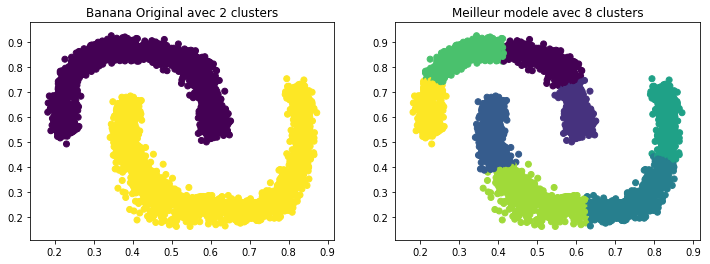

In [212]:
print("\n - Formes non convexes: Banana")
labels_bestModel1 = kmeans(dataset_banana,False,False,"Banana")
show_model(labels_bestModel1,dataset_banana, "Banana Original avec 2 clusters",
           "Meilleur modele avec "+str(len(set(labels_bestModel1)))+" clusters")

Pour les formes non convexes, K-means affiche un mauvais resultat en proposant 8 clusters au lieu de 2.
K-means crée des 'centres de clusters' un peu partout dans la figure (en fonction du nombre de clusters qu'on lui demande). C'est pour cela qu'on se retrouve souvent avec des clusters assez symétriques. Dans cette exemple, on peut déterminer les centres de clusters qui devraient correspondre au centre des formes qu'il propose.

Cependant, nous nous étonnons de voir que K-means affiche de bons scores (selon lui en tout cas) à partir de 6 clusters. 


 - Formes de densité variable : Wingnut
Le meilleur modele pour Wingnut contient 2 clusters. Il a un score de 46.02, et a un temps de calcul de 0.13 secondes.


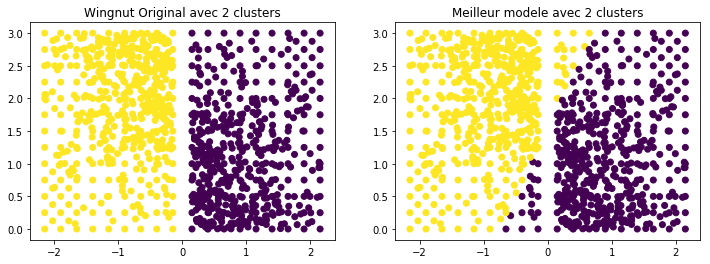

In [214]:
print("\n - Formes de densité variable : Wingnut")
labels_bestModel = kmeans(dataset_wing,False,False,"Wingnut")
show_model(labels_bestModel,dataset_wing, "Wingnut Original avec 2 clusters",
 "Meilleur modele avec "+str(len(set(labels_bestModel)))+" clusters")

K-means a également du mal à distinger des formes à densité variable. Encore une fois, on peut distinguer les centres de clusters dont il s'est basé pour commencer. Ce sont 2 clusters symétriques qui ne sont pas verticaux mais en diagonale.

#### Conclusion

   • Retrouvez-vous une sensibilité de l’algorithme à l’initialisation ?
   
Non, car kmeans++ utilise un certain algorithme à l’initialisation qui utilise toujours les memes points de départs en fonction de plusieurs dépendants de la dataset. Par contre, Random rend kmeans plus sensible car les points centraux de clustering à l'initialisation sont aléatoires, et plus symétriques comme avant. Ainsi, après plusieurs éxecutions, on peut obtenir des scores meilleurs que avec l'algorithme par défaut. Nous n'affichons pas les tests avec Random par manque de place.

   • La méthode est-elle sensible à la nature des formes (cercle, rectangle, losange, non connexes, ...) et à la densité des données ?
   
 La méthode est sensible aux formes circulaires, ou du moins celles qui s'en rapprochent. C'est le cas des formes convexes plus généralement. On obtient des scores de 70 et 60 pour respectivement des formes convexes bien separées et mal separées. En ce qui concerne les formes non convexes,les résultats eux sont catastrophiques et on est très loin de la classification de la dataset, bien que les scores soient corrects. Par exemple Banana est autour de 50 en score mais propose 8 clusters au lieu de 2. K-means est également sensible à la densité dans le sens où il ne prend pas en compte ce paramètre. Du moment que les formes sont convexes, comme pour Wingnut, les résultats restent assez bons.

# Clustering agglomératif

Tout d'abord, nous avons itéré sur les 4 métrics possibles, grâce à la fonction agglo_linkage, afin de trouver la meilleure manière de combiner des clusters selon le dataset. Ensuite, on garde cette donnée pour trouver le nombre de clusters idéal (en itérant dessus), et ainsi le meilleur score. Nous appliquons ceci sur tout type de formes: convexes bien et mal séparées, des formes non convexes et des formes de densité variable.

In [217]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
def agglo_linkage(dataset,nb_cluster,okLinkage,okTime):
    #Dataset
    dataset_2d = arff.loadarff(open('twodiamonds.arff','r'))
    #Variables
    linkages=["ward","complete","average","single"]
    data = get_data(dataset)
    bestScore = -100

    #Ploting variables
    x=[]
    yscore=[]
    ytime=[]

    #Linkages
    for i in range(len(linkages)):
        start = time.time()
        kmeans_model = AgglomerativeClustering(n_clusters=nb_cluster,linkage=linkages[i]).fit(data)
        delay = time.time() - start
        labels = kmeans_model.labels_
        
        n_clusters = len(set(labels))
        if(n_clusters>1):
            score = metrics.silhouette_score(data, labels, metric='euclidean')*100
            #Mise à jour du meilleur modèle
            if (score>bestScore):
                bestScore = score
                bestLabels = labels
                bestLinkage = linkages[i]
        else: 
            score = -100  
        
        x.append(linkages[i])
        ytime.append(delay)
        yscore.append(score)

    if okLinkage:
        #Plot Precision
        plt.scatter(x,yscore)
        plt.title('Score du Classificateur en fonction du Linkage\n')
        plt.xlabel('Linkage')
        plt.rcParams["figure.figsize"] = [12,4]
        plt.ylabel('Score')
        plt.show()

    if okTime:
        #Plot Time
        plt.scatter(x,ytime)
        plt.title('Temps d\' entrainement du Classificateur en fonction du Linkage\n')
        plt.xlabel('Linkage')
        plt.ylabel('Temps dentrainement')
        plt.rcParams["figure.figsize"] = [12,4]
        plt.show()
        
    return bestLinkage


In [234]:
def agglo(dataset,bestLinkage,okScore,okTime,datasetName) :
    #Variables   
    data = get_data(dataset)
    bestScore = -100
    bestTime = -1.0

    #Ploting variables
    x=[]
    yscore=[]
    ytime=[]
    
    for i in range (2,11):
        start = time.time()  
        model = AgglomerativeClustering(n_clusters=i,linkage=bestLinkage).fit(data)
        delay = time.time() - start
        labels = model.labels_
        
        n_clusters = len(set(labels))
        if(n_clusters>1):
            score = metrics.silhouette_score(data, labels, metric='euclidean')*100
            #Mise à jour du meilleur modèle
            if (score>bestScore):
                bestScore = score
                bestLabels = labels
                bestTime = delay
        else: 
            score = -100  
        
        x.append(i)
        ytime.append(delay)
        yscore.append(score)

    if okScore:
        #Plot Score
        plt.scatter(x,yscore)
        plt.title('Score du Classificateur en fonction du nombre de clusters\n')
        plt.xlabel('Nombre de clusters')
        plt.ylabel('Score')
        plt.show()

    if okTime: 
        #Plot Time
        plt.scatter(x,ytime)
        plt.title('Temps d\' entrainement du Classificateur en fonction du nombre de clusters\n')
        plt.xlabel('Nombre de clusters')
        plt.ylabel('Temps dentrainement')
        plt.rcParams["figure.figsize"] = [12,4]
        plt.show()
        
    print("Le meilleur modele pour "+datasetName+" contient "+str(len(set(best_labels)))+" clusters. Il a un score de "+str(round(bestScore,2))+", et a un temps de calcul de "+str(round(bestTime,4))+" secondes.")
    return bestLabels

 - Formes convexes assez bien séparées: 2Diamonds
Le meilleur modele pour 2 Diamonds contient 2 clusters. Il a un score de 63.06, et a un temps de calcul de 0.02 secondes.


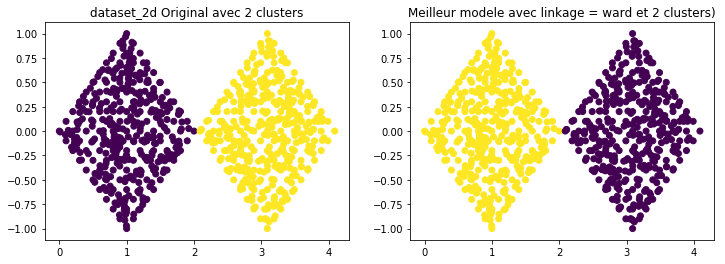

In [225]:
### Formes convexes assez bien séparées : 
print(" - Formes convexes assez bien séparées: 2Diamonds")
bestLinkage = agglo_linkage(dataset_2d,2, False, False)
bestLabels = agglo(dataset_2d,bestLinkage, False,False,"2 Diamonds")
show_model(bestLabels,dataset_2d, "dataset_2d Original avec 2 clusters",
           "Meilleur modele avec linkage = "+str(bestLinkage)+" et "+ str(len(set(bestLabels)))+" clusters)")


Le clustering agglomératif distingue parfaitement les formes convexes bien séparées comme on peut le remarquer sur la figure ci-dessus.


 - Formes convexes mal séparées: Sizes1
Le meilleur modele pour Sizes1 contient 2 clusters. Il a un score de 58.54, et a un temps de calcul de 0.03 secondes.


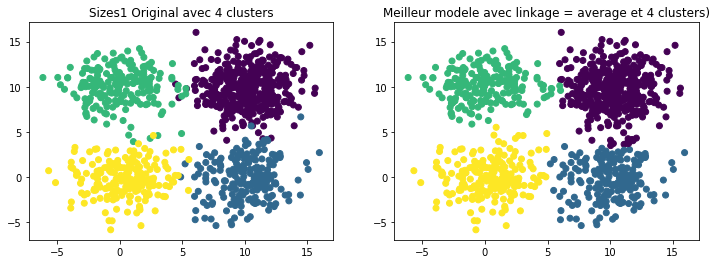

In [226]:
#Formes convexes mal séparées : 
print(" - Formes convexes mal séparées: Sizes1") 
bestLinkage = agglo_linkage(dataset_sizes1,3,False, False)
bestLabels = agglo(dataset_sizes1,bestLinkage, False,False,"Sizes1")
show_model(bestLabels,dataset_sizes1, "Sizes1 Original avec 4 clusters",
           "Meilleur modele avec linkage = "+str(bestLinkage)+" et "+ str(len(set(bestLabels)))+" clusters)")

Pour les formes convexes qui sont mal séparées, cette méthode a renvoyé un bon résultat malgré le fait que certains points sont mal classés. Cela n’empêche pas que nous retrouvons quand même le bon nombre de clusters.

 - Formes non convexes: Banana
Le meilleur modele pour Banana contient 2 clusters. Il a un score de 47.02, et a un temps de calcul de 0.28 secondes.


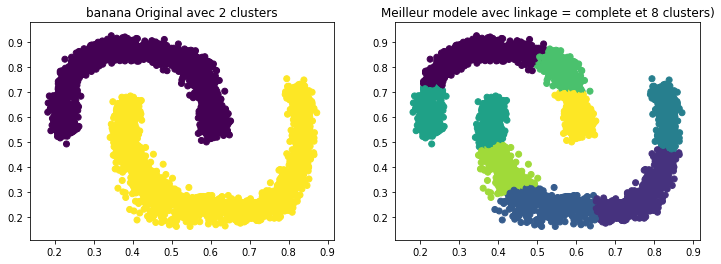

In [227]:
#Formes non convexes: Banana
print(" - Formes non convexes: Banana")
dataset_banana = arff.loadarff(open('banana.arff','r'))
bestLinkage = agglo_linkage(dataset_banana,2,False,False)
bestLabels = agglo(dataset_banana,bestLinkage,False,False,"Banana")
show_model(bestLabels,dataset_banana, "banana Original avec 2 clusters",
           "Meilleur modele avec linkage = "+str(bestLinkage)+" et "+ str(len(set(bestLabels)))+" clusters)")

Cette fois-ci, le clustering agglomératif a du mal à différencier les classes de formes non convexes. En effet, pour Banana, on retrouve un grand nombre de clusters ainsi que certains points de classes différentes qui sont considérés d’une même classe.


Le meilleur modele pour Wingnut contient 2 clusters. Il a un score de 44.82, et a un temps de calcul de 0.02 secondes.


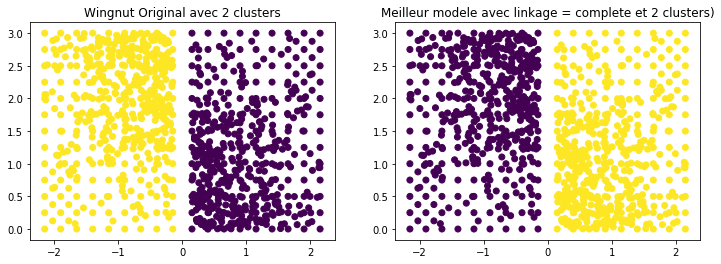

In [228]:
#Formes à densité variable
dataset_wing = arff.loadarff(open('wingnut.arff','r'))
bestLinkage = agglo_linkage(dataset_wing,2,False,False)
bestLabels = agglo(dataset_wing,bestLinkage,False,False,"Wingnut")
show_model(bestLabels,dataset_wing, "Wingnut Original avec 2 clusters",
           "Meilleur modele avec linkage = "+str(bestLinkage)+" et "+ str(len(set(bestLabels)))+" clusters)")

Pour les formes de densités variables, on a un très bon résultat avec 2 clusters bien distincts pour ce cas du wingnut ainsi d’une bonne répartition des points dans chaque classe.


Formes avec du bruit: Cure-t2
Le meilleur modele pour Cure-t2 contient 2 clusters. Il a un score de 46.48, et a un temps de calcul de 0.24 secondes.


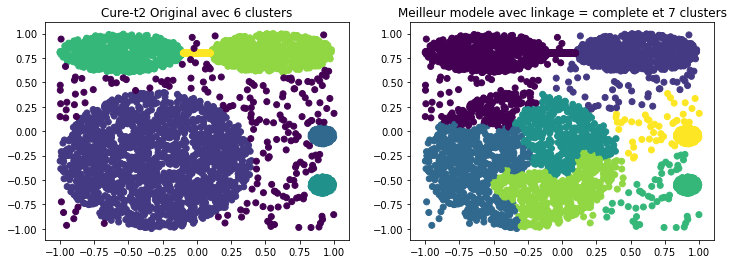

In [229]:
#Formes avec du bruit
print("Formes avec du bruit: Cure-t2")
bestLinkage = agglo_linkage(dataset_noise,2,False,False)
bestLabels = agglo(dataset_noise,bestLinkage,False,False,"Cure-t2")
show_model(bestLabels,dataset_noise, "Cure-t2 Original avec 6 clusters",
           "Meilleur modele avec linkage = "+str(bestLinkage)+" et "+ str(len(set(bestLabels)))+" clusters")

Dans ce cas, on a obtenu un résultat faible. En effet, cette méthode ne distingue pas le bruit des autres classes. On remarque que les points sont répartis par région et que cela ne correspond pas à l’original.

#### Conclusion

Le clustering agglomératif renvoie les meilleurs résultats dans le cas des formes convexes. Nous avons constaté cela à travers les deux exemples avec les formes qui sont bien et mal séparées. Il est aussi insensible aux densités des données comme ce qu’on a remarqué avec wingnut. Enfin, cette méthode a un point faible qui est les formes non convexes vu qu’elle renvoie des résultats qui sont très loins de ce qui est attendu. 

# Clustering DBSCAN

Après avoir choisi des valeurs aléatoires pour les paramètres epsilon et min-sample, nous allons essayer de détérminer les meilleurs valeurs possibles, pour chacune des datasets suivantes: formes convexes bien identifiées, des formes convexes mal séparées, des formes non convexes, des formes de densité variable et la présence de bruit. On essaie d'abord de déterminer le meilleur, ensuite on le garde et on cherche le meilleur min_sample, le tout, pour chaque forme.


In [274]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN
#Fonction pour faire varier Epsilon
def epsilon(dataset,min_range,max_range,step,okScore,okTime,datasetName):
    
    #Variables
    best_score = -2000
    best_epsilon = 0.0
    best_time = -1.0
    best_labels = DBSCAN(eps=min_range/1000.0).fit(get_data(dataset)).labels_
    x,yscore,ytime = [],[],[]
    
    #Iterations sur epsilon
    for i in range(min_range,max_range,step):
        start = time.time()
        model = DBSCAN(eps=i/1000.0).fit(get_data(dataset))
        delay = time.time() - start
        labels = model.labels_
        n_clusters = len(set(labels))
        
        #On ne peut pas calculer le score lorsqu'il y a seulement un cluster
        if(n_clusters>1):
            score = metrics.silhouette_score(get_data(dataset),labels)*100
            if best_score<score :  #Le meilleur modèle est mis à jour
                best_labels  = labels
                best_epsilon = i
                best_score = score
                best_time = delay
        else: 
            score = -100.0   #Indicatif : Un score de -100 correspond à 1 Cluster (comme c'est impossible d'avoir un  1 seul Cluster)
        x.append(i/1000.0)
        ytime.append(delay)
        yscore.append(score)

    if okScore :
        #Plot Precision 
        plt.scatter(x,yscore)
        plt.title('Score du Classificateur en fonction de Epsilon\n')
        plt.xlabel('Epsilon')
        plt.ylabel('Score')
        plt.rcParams["figure.figsize"] = [12,4]
        plt.show()

    if okTime : 
        #Plot Time
        plt.scatter(x,ytime)
        plt.title('Temps d\' entrainement du Classificateur en fonction de Epsilon\n')
        plt.xlabel('Epsilon')
        plt.ylabel('Temps dentrainement')
        plt.rcParams["figure.figsize"] = [12,4]
        plt.show()
        
    print("En gardant min_sample par défault, la meilleur valeur de Epsilon pour "+datasetName+" est de "+str(best_epsilon/1000.0)+". Elle correspond à un score de "+str(round(best_score,2))+", et a un temps de calcul de "+str(round(best_time,4))+" sec.")
    return best_labels,best_epsilon/1000.0

In [288]:
#Fonction pour faire varier la taille des voisinages (min_sample)
def min_sample(dataset,min_range,max_range,step,okScore,okTime,epsi,datasetName):
    
    #Variables
    x,yscore,ytime = [],[],[]
    bestScore = -100
    bestTime = -1.0
    bestMinRange = min_range
    bestLabels = DBSCAN(eps=epsi,min_samples=min_range).fit(get_data(dataset)).labels_

    #Itérations sur la taille minimale des échantillons
    for i in range(min_range,max_range,step): 
        start = time.time()
        model = DBSCAN(eps=epsi,min_samples=i).fit(get_data(dataset))
        delay = time.time() - start
        labels = model.labels_
        n_clusters = len(set(labels))
        if(n_clusters>1):
            score = metrics.silhouette_score(get_data(dataset), labels)*100
            #Mise à jour du meilleur modèle
            if (score>bestScore):
                bestScore = score
                bestLabels = labels
                bestMinRange = i
                bestTime = delay
        else: 
            score = -100   #Indicatif : 1 Cluster <=> Score=-100
        x.append(i)
        ytime.append(delay)
        yscore.append(score)

    if okScore:
        #Plot Precision
        plt.scatter(x,yscore)
        plt.title('Score du Classificateur en fonction de la taille des voisinages\n')
        plt.xlabel('Minimum d\'echantillons')
        plt.ylabel('Score')
        plt.rcParams["figure.figsize"] = [12,4]
        plt.show()

    if okTime :
        #Plot Time
        plt.scatter(x,ytime)
        plt.title('Temps d\' entrainement du Classificateur en fonction de la taille des voisinages\n')
        plt.xlabel('Minimum d\'echantillons')
        plt.ylabel('Temps')
        plt.rcParams["figure.figsize"] = [12,4]
        plt.show()
    
    print("En variant min_sample, on obtient comme meilleur valeur "+str(bestMinRange)+". Il correspond à un score de "+str(round(bestScore,2))+", et a un temps de calcul de "+str(round(bestTime,4))+" sec.")
    return bestLabels,bestMinRange

 - Formes convexes bien séparées : Spherical

En gardant min_sample par défault, la meilleur valeur de Epsilon pour Spherical est de 0.92. Elle correspond à un score de 68.98, et a un temps de calcul de 0.006 sec.
En variant min_sample, on obtient comme meilleur valeur 0. Il correspond à un score de 68.98, et a un temps de calcul de 0.0057 sec.


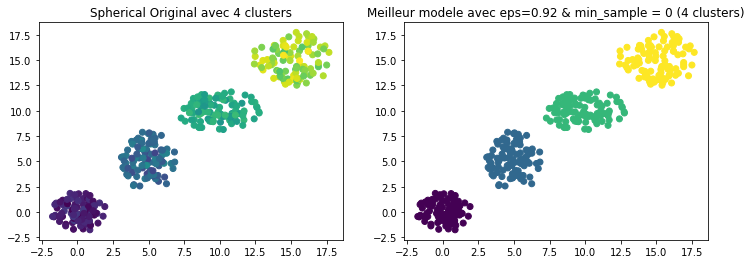

In [282]:
print(" - Formes convexes bien séparées : Spherical\n")
best_labels1, eps_spherical = epsilon(dataset_spherical,500,1000,10,False,False,"Spherical") #Les valeurs de range sont divisées par 1000 dans la fonction, ici Epsilon va de 0.05 à 1.
#show_model(best_labels,dataset_spherical, "Spherical Original avec 4 clusters",
#           "Meilleur modele avec epsilon = "+str(eps_spherical)+" & ("+str(len(set(best_labels)))+" clusters)")

best_labels, minSample = min_sample(dataset_spherical,0,50,1,False,False,eps_spherical,"Spherical") #0 à 50, par pas de 1
show_model(best_labels,dataset_spherical, "Spherical Original avec 4 clusters",        
           "Meilleur modele avec eps="+str(eps_spherical)+" & min_sample = "+str(minSample)+" ("+str(len(set(best_labels)))+" clusters)")

Le valeur d'Epsilon qui rend le meilleur score possible pour cette dataset se situe entre 0.7 et 1.0. Les scores sont quasiment les mêmes pour  tous les espilon dans cet intervale-là. DBSCAN affiche de bons résultats pour les formes convexes, que ce soit en terme de score ou de clustering.

NB: Cette dataset est assez particulière car comme on peut l'apercevoir dans son affichage, il y énormement de nuances de couleurs, et donc beaucoup de classes. Il y en a plus de 300 en realité. Cependant, on se doute bien que ce sont 4 grandes classes, distinctes, et avec des couleurs très proches. DBSCAN arrive à faire abstraction de ces nuances et à bien rassembler tous les points en fonction de leurs localisation. Si ces nuances de couleurs avaient été un défault initialement, DBSCAN aurait pu le corriger.

 - Formes convexes mal séparées : Sizes1

En gardant min_sample par défault, la meilleur valeur de Epsilon pour Sizes1 est de 0.94. Elle correspond à un score de 44.66, et a un temps de calcul de 0.0142 sec.
En variant min_sample, on obtient comme meilleur valeur 6. Il correspond à un score de 51.92, et a un temps de calcul de 0.0141 sec.


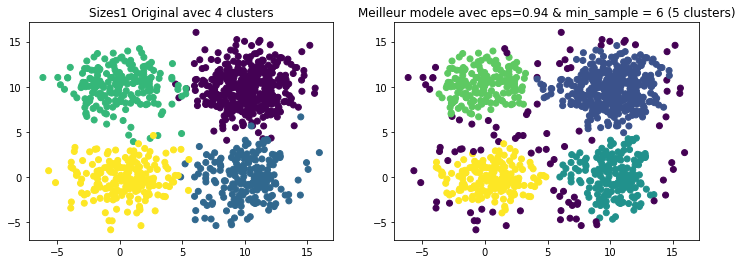

In [284]:
print(" - Formes convexes mal séparées : Sizes1\n")
best_labels1, eps_sizes1 = epsilon(dataset_sizes1,700,1000,10,False,False,"Sizes1") #From 0.7 to 1.0
best_labels, minSample = min_sample(dataset_sizes1,0,50,1,False,False,eps_sizes1,"Sizes1")
show_model(best_labels,dataset_sizes1, "Sizes1 Original avec 4 clusters",
           "Meilleur modele avec eps="+str(eps_sizes1)+" & min_sample = "+str(minSample)+" ("+str(len(set(best_labels)))+" clusters)")

Pour les formes convexes mais mal separées, les résultas sont assez bons (45 pour epsilon entre 0.90 et 0.95). 
Visuellement aussi c'est plutot bon puisqu'on retrouve les 4 grandes classes. Seulement, DBSCAN est sensible aux points assez éloignés de leurs voisins initiaux et estime qu'ils appartiennent tous à un meme 5e cluster (couleur violet, à droite). DBSCAN a un peu du mal avec les formes non compacts, bien que convexes. 


 - Formes non convexes et de densités égales : Banana

En gardant min_sample par défault, la meilleur valeur de Epsilon pour Banana est de 0.035. Elle correspond à un score de 36.73, et a un temps de calcul de 0.098 sec.
En variant min_sample, on obtient comme meilleur valeur 134. Il correspond à un score de 38.07, et a un temps de calcul de 0.0642 sec.


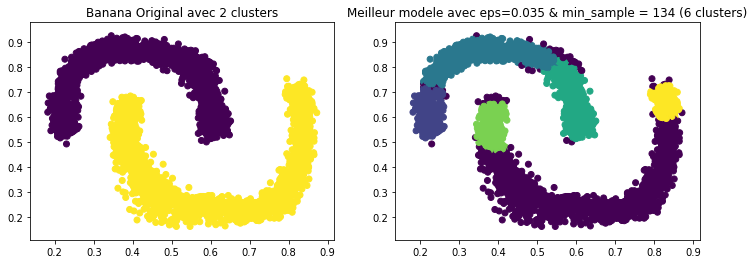

In [285]:
print("\n - Formes non convexes et de densités égales : Banana\n")
best_labels1, eps_banana = epsilon(dataset_banana,5,100,5,False,False,"Banana") #From 0.005 to 0.100 
best_labels, minSample = min_sample(dataset_banana,0,250,2,False,False,eps_banana,"Banana")
show_model(best_labels,dataset_banana, "Banana Original avec 2 clusters",
           "Meilleur modele avec eps="+str(eps_banana)+" & min_sample = "+str(minSample)+" ("+str(len(set(best_labels)))+" clusters)")

Le fait que la dataset Banana soit composée de formes non convexes n'a pas trop l'air de géner DBSCAN pour la banane du bas, mais pas pour celle du haut. Dans ce cas-ci, le meilleur Epsilon retenu est très petit, 0.035. En effet, il y a beaucoup de points dans cette dataset qui ne sont pas très proches de leurs voisins et DBSCAN n'a pas l'air de remarquer que ce sont des voisins.

Si faire varier epsilon (la distance maximale pour considérer 2 points comme voisins) avait un réel effet positif, la variation de la taille minimale des voisinages, elle, n'arrange rien pour les formes non convexes et bien séparées. 

 - Formes de densités variables : Wingnut 

En gardant min_sample par défault, la meilleur valeur de Epsilon pour Wingnut est de 0.25. Elle correspond à un score de 44.82, et a un temps de calcul de 0.0154 sec.
En variant min_sample, on obtient comme meilleur valeur 0. Il correspond à un score de 44.82, et a un temps de calcul de 0.016 sec.


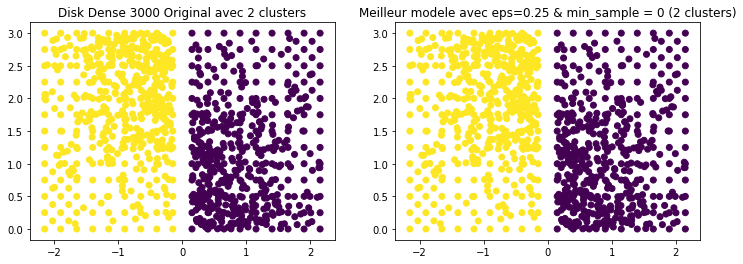

In [286]:
print(" - Formes de densités variables : Wingnut \n")
best_labels1, eps_wing = epsilon(dataset_wing,150,350,20,False,False,"Wingnut") #From 0.6 to 0.8 
best_labels, minSample = min_sample(dataset_wing,0,60,1,False,False,eps_wing,"Wing")
show_model(best_labels,dataset_wing, "Disk Dense 3000 Original avec 2 clusters",
           "Meilleur modele avec eps="+str(eps_wing)+" & min_sample = "+str(minSample)+" ("+str(len(set(best_labels)))+" clusters)")

Les résultats sont très bons pour les formes avec des densités variables. DBSCAN est donc insensible à la densité. Le résultat est parfait. Encore une fois, DSBCAN gère bien la densité variable pour une forme donnée.

 - Formes avec du bruit : Cure-t2

En gardant min_sample par défault, la meilleur valeur de Epsilon pour Cure-t2 est de 0.054. Elle correspond à un score de 41.62, et a un temps de calcul de 0.0411 sec.
En variant min_sample, on obtient comme meilleur valeur 6. Il correspond à un score de 41.59, et a un temps de calcul de 0.04 sec.


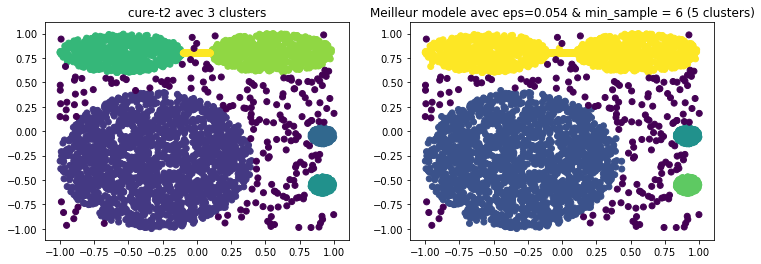

In [287]:
print(" - Formes avec du bruit : Cure-t2\n")
best_labels1,eps_noise = epsilon(dataset_noise,10,200,2,False,False,"Cure-t2") #From 0 to 0.200 
best_labels,minSample = min_sample(dataset_noise,0,200,2,False,False,eps_noise,"Cure t-2")
show_model(best_labels,dataset_noise, "cure-t2 avec 3 clusters",
           "Meilleur modele avec eps="+str(eps_noise)+" & min_sample = "+str(minSample)+" ("+str(len(set(best_labels)))+" clusters)")

Comme préssenti tout à l'heure, DBSCAN est légérement sensible aux formes qui se chevauchent, ne serait-ce que légérement.  La valeur de epsilon est très petite pour cette dataset. Comme les formes sont collées et que epsilon est petit, DBSCAN pense que les formes collées ne sont en réalité qu'une seule forme. Cependant, DBSCAN arrive à distinguer la quasi totalité du bruit et le mettre dans un cluster unique, à l'exception de quelques points collés aux autres formes.

La variation de min_sample n'arrange absolument pas DBSCAN pour les formes avec du bruit. Les scores restent néanmoins assez bons mais ce n'est pas représentatif.

#### Conclusion Epsilon
La valeur d'epsilon dépend de la dataset, et surtout de son échelle, à savoir la distance entre les différents points. Par exemple, pour la dataset 2 Diamonds ayant des formes convexes denses avec des points très proche: Le meilleur score est obtenu pour un epsilon bien précis et petit se situant autour de 0.12.

Que ce soit pour les formes convexes on non convexes, du moment que les formes sont distinctes, denses et sans bruits, les résultats sont au moins assez bons. C'est le cas pour Spherical par exemple. En ce qui concerne la séparation des formes, on voit bien que pour 2Diamonds, DBSCAN a du mal à gérer les points situés entre les 2 losanges, mais le résultat reste assez bon. En parlant de 2Diamonds, on apercoit aussi l'éffet de la densité. Puisque DBSCAN a retenu un epsilon petit et les points légérement détachés sont considérés comme appartenant à d'autres clusters. 

##### Conclusion Min-sample

On remarque que en variant min_sample, DBSCAN affiche les meilleurs résultats possibles sur des formes très denses. DBSCAN arrive à s'adapter en cas de variation de densité mais reste un peu sensible au bruit par contre. 

Nous pensons aussi que DBSCAN affiche les meilleurs résultats lorsque les différentes formes sont très proches, voire collées. Celà explique pourquoi la dataset Banana bien que très dense en points, se retouve avec un seul cluster. Et cela explique pourquoi les autres sont plutot bien traités. La dataset Sizes1 est un bon exemple car elle se situe à mi chemin: elle est très dense en points mais les formes sont légérements éloignées. Le résutat est donc lui aussi mitigé avec la reconnaissance des formes mais pas des points autour.


# Clustering HDBSCAN


Pour cette partie, les paramètres les plus importants à utiliser sont min_cluster_size et min_samples. Afin d'avoir les meilleures performances, nous avons décider de chercher d'abord le min_cluster_size qui renvoie le meilleur score. Ensuite, nous rajoutons le paramètre min_samples qu'on va faire varier entre 1 et la meilleure valeur de min_cluster_size. Cela nous permettrait de choisir le bon nombre de points par cluster et d'éviter de considérer certains points comme bruit alors qu'ils appartiennent à des clusters de petites tailles.

In [289]:
def hdb_scan_cluster_size(dataset,min_range,max_range,step,okTime,okScore):
    
    #Variables
    x,yscore,ytime = [],[],[]
    bestScore = -100
    bestMinRange = min_range
    bestLabels = hdbscan.HDBSCAN(min_cluster_size=min_range).fit(get_data(dataset)).labels_

    #Itérations sur la taille minimale des échantillons
    for i in range(min_range,max_range,step): 
        start = time.time()
        model = hdbscan.HDBSCAN(min_cluster_size=i).fit(get_data(dataset))
        delay = time.time() - start
        labels = model.labels_
        n_clusters = len(set(labels))
        if(n_clusters>1):
            score = metrics.silhouette_score(get_data(dataset), labels)*100
            #Mise à jour du meilleur modèle
            if (score>bestScore):
                bestScore = score
                bestLabels = labels
                bestMinRange = i
        else: 
            score = -100   #Indicatif : 1 Cluster <=> Score=-100
        x.append(i)
        ytime.append(delay)
        yscore.append(score)
    
    if okScore :
        #Plot Precision
        plt.scatter(x,yscore)
        plt.title('Score du Classificateur en fonction de min_cluster_size\n')
        plt.xlabel('min_cluster_size')
        plt.ylabel('Score')
        plt.rcParams["figure.figsize"] = [10,4]
        plt.show()

    if okTime :
        #Plot Time
        plt.scatter(x,ytime)
        plt.title('Temps d\' entrainement du Classificateur en fonction de min_cluster_size\n')
        plt.xlabel('Minimum d\'echantillons')
        plt.ylabel('Temps')
        plt.rcParams["figure.figsize"] = [10,4]
        plt.show()
        
    print("Le meilleur score est de "+ str(round(bestScore,2))+" pour min_cluster_size = "+ str(bestMinRange))  
    return bestLabels,bestMinRange,bestScore

In [89]:
def hdb_scan_min_samples(dataset,minHdbscan,best_score,best_Labels) :
    #bestScore = best_score
    x,yscore,ytime = [],[],[]
    bestScore = -100
    #bool_min_samples = False 
    #bestLabels=best_Labels
    
    for i in range(1,minHdbscan,1): 
        start = time.time()
        model = hdbscan.HDBSCAN(min_samples=i , min_cluster_size=minHdbscan).fit(get_data(dataset))
        delay = time.time() - start
        labels = model.labels_
        n_clusters = len(set(labels))
        if(n_clusters>1):
            score = metrics.silhouette_score(get_data(dataset), labels)*100
            #Mise à jour du meilleur modèle
            if (score>bestScore):
                bestScore = score
                bestLabels = labels
                bestMinRange = i
                bool_min_samples = True
        else: 
            score = -100   #Indicatif : 1 Cluster <=> Score=-100
        x.append(i)
        ytime.append(delay)
        yscore.append(score)
        
        if bestScore < best_score:
            bestMinRange = "none"
            bestLabels = best_Labels
        
    print("Pour min_cluster_size = "+ str(minHdbscan) + " et min_samples = " + str(bestMinRange) + " le meilleur score devient : " + str(round(bestScore,2)))
    return bestScore,bestMinRange,bestLabels

Formes convexes bien séparées : Spherical

Le meilleur score est de 68.98 pour min_cluster_size = 3
Pour min_cluster_size = 3 et min_samples = none le meilleur score devient : 52.9


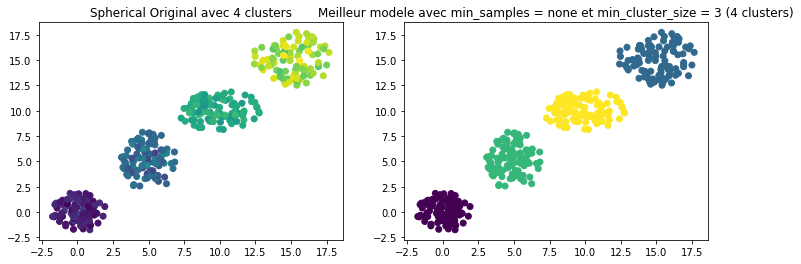

In [290]:
print("Formes convexes bien séparées : Spherical\n")
best_labels,minHdbscan,bScore = hdb_scan_cluster_size(dataset_spherical,2,100,1,False,False)

bestScore,bestMinRange, bestLabels = hdb_scan_min_samples(dataset_spherical,minHdbscan,bScore,best_labels)

show_model(bestLabels,dataset_spherical, "Spherical Original avec 4 clusters",
           "Meilleur modele avec min_samples = "+str(bestMinRange)+" et min_cluster_size = "+str(minHdbscan)+" ("+str(len(set(bestLabels)))+" clusters)")

Nous remarquons que HDBSCAN arrive bien à distinguer chaque cluster. En effet, pour min_cluster_size à 3, on arrive à avoir un très bon résultat avec 4 clusters bien distincts. Par contre, en rajoutant le paramètre min_samples, on obtient un résultat moins et c'est pour cela que nous le gardons à nul.

Formes convexes mal séparées: Sizes1 

Le meilleur score est de 51.74 pour min_cluster_size = 8
Pour min_cluster_size = 8 et min_samples = 3 le meilleur score devient : 52.18


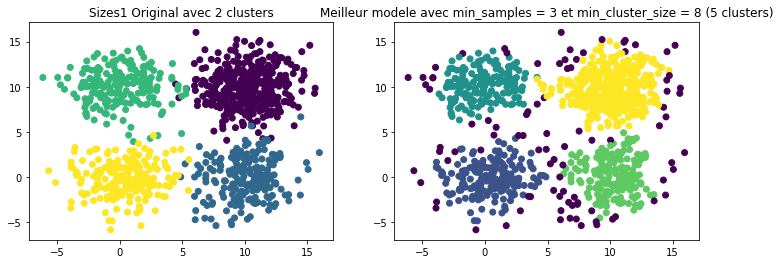

In [291]:
print("Formes convexes mal séparées: Sizes1 \n")
best_labels,minHdbscan,bScore = hdb_scan_cluster_size(dataset_sizes1,2,100,2,False,False)

bestScore,bestMinRange,bestLabels = hdb_scan_min_samples(dataset_sizes1,minHdbscan,bScore,best_labels)

show_model(bestLabels,dataset_sizes1, "Sizes1 Original avec 2 clusters",
         "Meilleur modele avec min_samples = "+str(bestMinRange)+" et min_cluster_size = "+str(minHdbscan)+" ("+str(len(set(bestLabels)))+" clusters)")

Pour les formes convexes mal séparées, cette méthode a plus de mal à bien différencier les clusters. On remarque qu’il y a une distinction entre ces derniers, sauf que pour les points plus éloignés, cette méthode n’arrive pas bien à les attribuer à leurs formes. Cette fois-ci, on a utilisé le paramètre min_samples pour améliorer le résultat final.


Formes non convexes et de densités égales : Banana

Le meilleur score est de 36.73 pour min_cluster_size = 4
Pour min_cluster_size = 4 et min_samples = 2 le meilleur score devient : 36.73


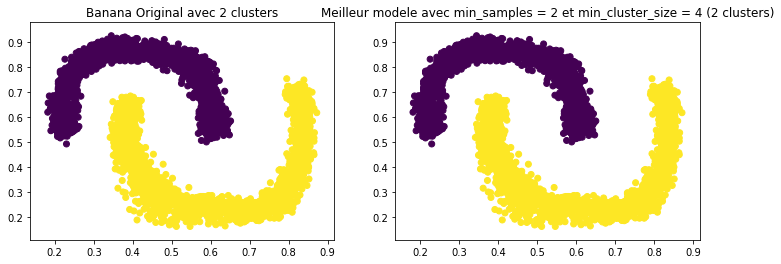

In [292]:
print("Formes non convexes et de densités égales : Banana\n")
best_labels,minHdbscan,bScore = hdb_scan_cluster_size(dataset_banana,2,70,2,False,False)

bestScore,bestMinRange,bestLabels = hdb_scan_min_samples(dataset_banana,minHdbscan,bScore,best_labels)

show_model(bestLabels,dataset_banana, "Banana Original avec 2 clusters",
         "Meilleur modele avec min_samples = "+str(bestMinRange)+" et min_cluster_size = "+str(minHdbscan)+" ("+str(len(set(bestLabels)))+" clusters)")

Pareil que le cas précédent, cette méthode n’a pas de mal avec les formes non convexes et de densités égales comme dans le cas de Banana où on remarque une bonne séparation entre les classes.


Formes de densités variables : wing 

Le meilleur score est de 44.82 pour min_cluster_size = 3
Pour min_cluster_size = 3 et min_samples = none le meilleur score devient : 19.65


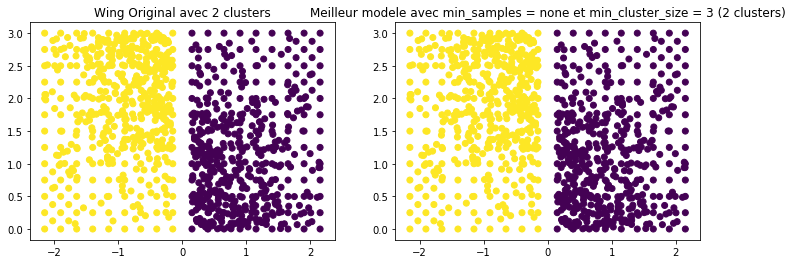

In [293]:
print("Formes de densités variables : wing \n")
best_labels,minHdbscan,bScore = hdb_scan_cluster_size(dataset_wing,2,100,1,False,False)

bestScore,bestMinRange,bestLabels = hdb_scan_min_samples(dataset_wing,minHdbscan,bScore,best_labels)

show_model(bestLabels,dataset_wing, "Wing Original avec 2 clusters",
           "Meilleur modele avec min_samples = "+str(bestMinRange)+" et min_cluster_size = "+str(minHdbscan)+" ("+str(len(set(bestLabels)))+" clusters)")

Dans le cas des densités variables, HDBSCAN a réussi à bien séparer les clusters. On a obtenu un excellent résultat malgré le fait que le score soit faible. D’ailleurs, le fait de bien distinguer les densités est considéré parmi les points forts de cette méthode.


Formes avec du bruit : cure-t2-4k 

Le meilleur score est de 45.67 pour min_cluster_size = 72
Pour min_cluster_size = 72 et min_samples = none le meilleur score devient : 42.96


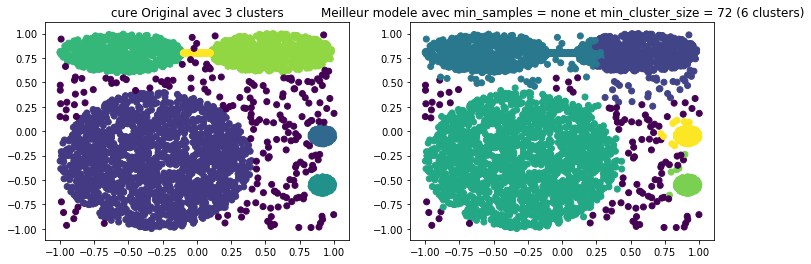

In [294]:
print("Formes avec du bruit : cure-t2-4k \n")
best_labels,minHdbscan,bScore = hdb_scan_cluster_size(dataset_noise,40,100,2,False,False)
bestScore,bestMinRange,bestLabels = hdb_scan_min_samples(dataset_noise,minHdbscan,bScore,best_labels)
show_model(bestLabels,dataset_noise, "cure Original avec 3 clusters",
          "Meilleur modele avec min_samples = "+str(bestMinRange)+" et min_cluster_size = "+str(minHdbscan)+" ("+str(len(set(bestLabels)))+" clusters)")

On remarque que HDBSCAN arrive à bien distinguer le bruit bien qu’il considère certains points comme du bruit et que certains points bruit soient classés dans des clusters. Néanmoins le résultat en globalité est correct. On constate aussi qu’il a aussi du mal à séparer des clusters qui sont liés.


#### Conclusion: 

D'après les résultats, nous remarquons que HDBSCAN arrive à bien identifier les formes convexes bien séparées comme spherical. C'est aussi le cas avec les formes convexes mal séparées de Sizes1 avec une performance moins importante. 
Pour les formes qui contiennent du bruit, HDBSCAN distingue le bruit des autres clusters même s'il considère quelques points comme bruits alors qu'ils ne le sont pas, ou l'inverse.
Enfin, on remarque qu'il renvoie de très bon résultat avec les formes de densités variées comme le cas du dataset wingnut et même avec les formes non convexe comme par exemple pour banana



# Synthèse

KMeans et DBScan sont considérées comme les méthodes les plus utilisées et les plus évidentes à implémenter. Chacune dispose de caractéristiques et de performances différentes. 


KMeans est plus rapide que DBScan. Tandis que ce dernier n'a pas besoin du nombre de cluster. Parmi les inconvénients de KMeans on constate qu'elle essaie de créer un cluster de même taille, peu importe la façon dont les données sont dispersées. Cette méthode ne se soucie pas aussi de la densité des données.

DBSCAN résout certains des problèmes des KMeans en travaillant avec la densité des points. Il s'agit d'une méthode basée sur la densité. L'hypothèse principale de DBSCAN est que deux régions denses sont séparées par une région peu dense. 
 DBScan ne fonctionne pas bien sur des clusters de densités différentes. Elle a besoin d'une sélection rigoureuse de ses paramètres.
    

Pour le clustering agglomératif, ses points forts sont qu'il est facile à comprendre et à implémenter, à l'image de K-means d'ailleurs. Par contre, il fournit rarement la meilleure solution. Il implique beaucoup de décisions arbitraires vu que nous n'avons pas manipulé beaucoup de paramètres. En plus, il fonctionne mal avec des types de données mixtes et  sur de très grands ensembles de données. C'est pourquoi des clusters plus petits sont générés, mais cela peut être utile pour la découverte par exemple. Le clustering agglomératif est d'une complexité temporelle élevée. L'utilisation de différentes métriques de distance pour mesurer les distances entre les clusters peut générer des résultats différents. Le mieux est d'effectuer plusieurs expériences et de comparer les résultats pour confirmer la véracité des résultats originaux.
            
    
Pour HDBScan, l'avantage important est que nous pouvons apercevoir concerne les formes de densité variable. Puis, le deuxième avantage est que le paramètre epsilon est éliminé. Au lieu de cela, nous avons un nouveau paramètre min_cluster_size qui est utilisé pour déterminer le nombre de points qu'on veut avoir au minimum dans un cluster. Cela échange un paramètre peu intuitif par un paramètre qui n'est pas si difficile à choisir. Cela s'applique également sur DBSCAN. Le réel atout de HDBSCAN comparé à DBSCAN reste la gestion des densités variables et dans une moindre mesure, le bruit
